In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [151]:
df = pd.read_csv("student_sleep_patterns.csv")
df.head(10)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51
6,7,22,Female,2nd Year,6.5,11.7,3.4,1,99,6,13.05,20.96,8.58,10.81
7,8,22,Male,2nd Year,6.1,7.8,3.0,1,108,4,10.49,10.85,5.60,10.02
8,9,24,Female,1st Year,8.6,2.4,1.4,1,86,7,11.06,18.88,8.14,8.78
9,10,19,Other,2nd Year,5.8,8.2,2.0,3,44,8,14.65,5.31,7.47,9.37


In [153]:
# Check for missing values
print(df.isnull().sum())

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64


In [155]:
#summary statistics for numerical columns
df.describe()


,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [157]:
# Generate a correlation matrix using corr()
df_numerical = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numerical.corr()
print(correlation_matrix)

                     Student_ID       Age  Sleep_Duration  Study_Hours  \
Student_ID             1.000000 -0.011331        0.047879    -0.054734   
Age                   -0.011331  1.000000       -0.016015     0.057414   
Sleep_Duration         0.047879 -0.016015        1.000000    -0.011092   
Study_Hours           -0.054734  0.057414       -0.011092     1.000000   
Screen_Time           -0.034363 -0.081954        0.067934    -0.040334   
Caffeine_Intake       -0.025967  0.008263       -0.014531     0.032473   
Physical_Activity      0.058308  0.016019       -0.006768    -0.048811   
Sleep_Quality          0.013035  0.019969       -0.015639     0.058708   
Weekday_Sleep_Start    0.040177  0.015307       -0.079370    -0.008048   
Weekend_Sleep_Start   -0.040319  0.005480        0.035302    -0.009699   
Weekday_Sleep_End      0.048362  0.019787       -0.035287     0.010816   
Weekend_Sleep_End     -0.066054  0.059230       -0.043764     0.051128   

                     Screen_Time  Caf

In [159]:
print(df['Age'].value_counts())

Age
21    76
25    72
18    71
20    64
23    62
24    58
22    51
19    46
Name: count, dtype: int64


In [161]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End'],
      dtype='object')

In [163]:
def plot_bar_chart(data):
    avg_study_hours = data.groupby('University_Year')['Study_Hours'].mean()  # Group by University Year
    ax = avg_study_hours.plot(kind='bar', color='skyblue', figsize=(10, 6))
    plt.title('Average Study Hours by University Year', fontsize=16)
    plt.xlabel('University Year', fontsize=14)
    plt.ylabel('Average Study Hours', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout() 
    plt.savefig("bar.png")

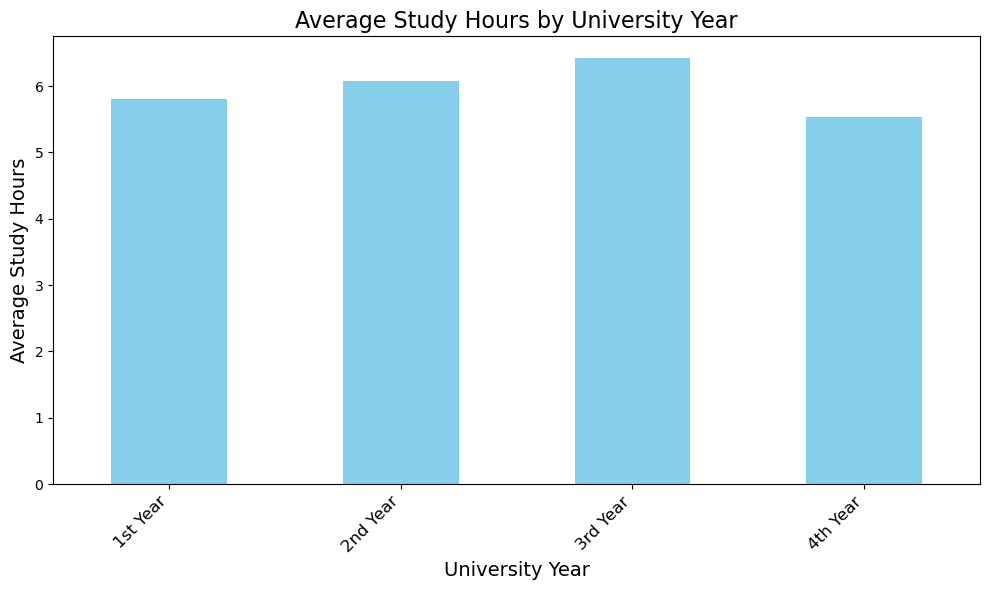

In [165]:
plot_bar_chart(df)

In [167]:
# Function to create a histogram
def plot_histogram(data):
    age_skewness = skew(df['Screen_Time'])
    age_kurtosis = kurtosis(df['Screen_Time'], fisher=False)
    plt.hist(data['Screen_Time'], bins=10,color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of Screen Time\nSkewness: {age_skewness:.2f}, Kurtosis: {age_kurtosis:.2f}')
    plt.xlabel('Screen Time (hours)')
    plt.ylabel('Number of Students')
    plt.savefig("histogram.png")

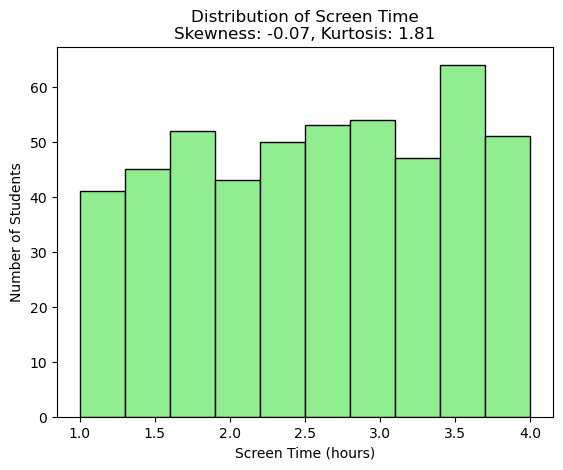

In [169]:
plot_histogram(df)


In [171]:
# Function to create a scatter plot
def plot_scatter(data):
    plt.scatter(data['Study_Hours'], data['Sleep_Quality'], color='orange')
    plt.title('Study Hours vs Sleep Quality')
    plt.xlabel('Study Hours')
    plt.ylabel('Sleep Quality')
    plt.savefig('scatter.png')

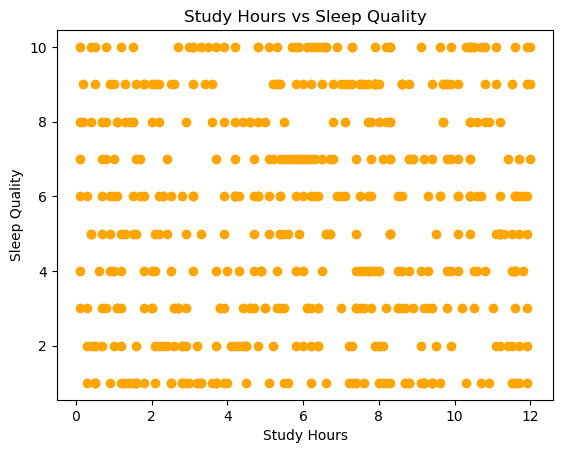

In [173]:
plot_scatter(df)

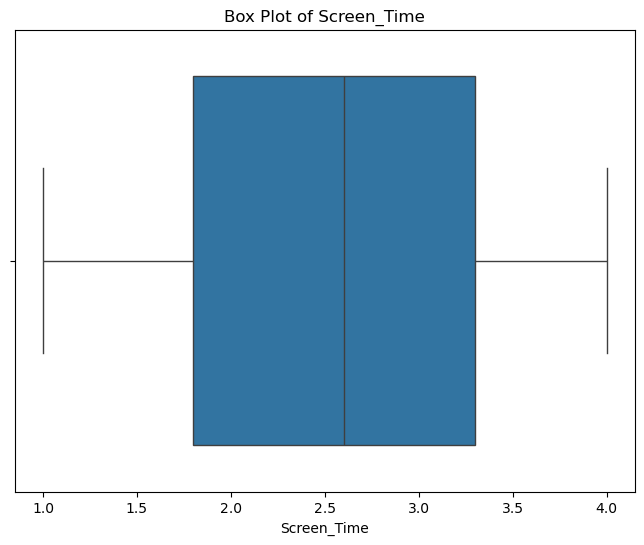

In [175]:
def plot_box_plot(data, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.savefig('box_plot.png')
plot_box_plot(df, 'Screen_Time')